<a href="https://colab.research.google.com/github/madelynndinh/stock-price-prediction/blob/main/Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import the libraries
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yfin

plt.style.use("fivethirtyeight")

In [57]:
#Get the stock quote
yfin.pdr_override()
df = web.get_data_yahoo('AAPL', start='2012-01-01', end = '2023-12-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500644,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639429,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2023-12-11,193.110001,193.490005,191.419998,193.179993,192.933807,60943700
2023-12-12,193.080002,194.720001,191.720001,194.710007,194.461868,52696900
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.707718,70404200


In [58]:
#Get the number of rows and columns in the data set
df.shape

(3009, 6)

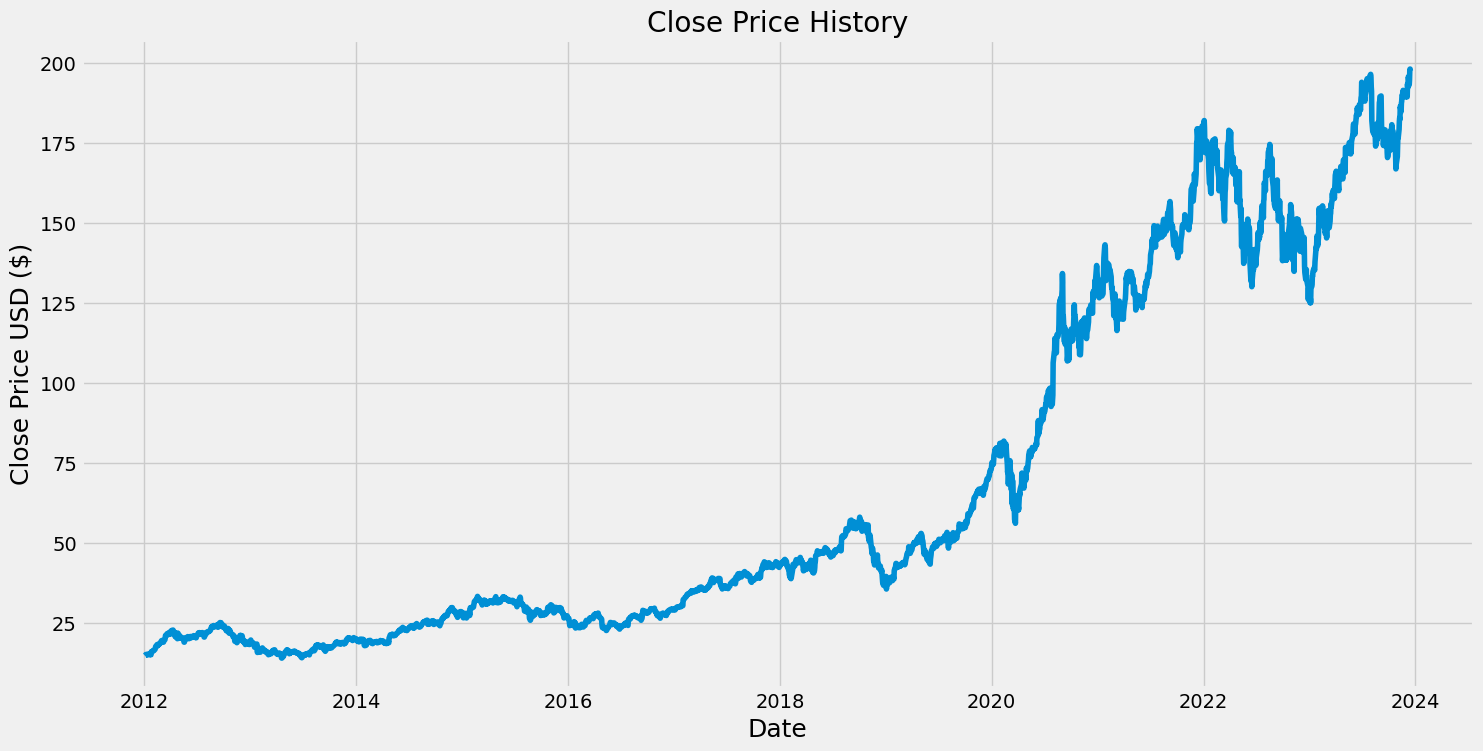

In [59]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [60]:
#Create new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2408

In [61]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.99918554],
       [1.        ],
       [0.99706784]])

In [62]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [63]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array (y_train)

In [64]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2348, 60, 1)

In [65]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [66]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [67]:
#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2348/2348 [==============================] - 70s 28ms/step - loss: 8.3693e-04


In [68]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0 ])


In [69]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [70]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [71]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the value
predictions

19/19 [==============================] - 1s 15ms/step


array([[149.05663],
       [148.87639],
       [148.69412],
       [148.49324],
       [148.5117 ],
       [148.59015],
       [148.70515],
       [148.72328],
       [148.68661],
       [148.57085],
       [148.45758],
       [148.69447],
       [149.09944],
       [149.77095],
       [150.39462],
       [150.50096],
       [150.37819],
       [150.31386],
       [150.4513 ],
       [150.66365],
       [150.75208],
       [150.67981],
       [150.65282],
       [151.15118],
       [151.7068 ],
       [152.31123],
       [152.99704],
       [153.71602],
       [154.63483],
       [155.36984],
       [155.81844],
       [155.50623],
       [154.91869],
       [154.09273],
       [153.343  ],
       [152.68736],
       [151.85223],
       [150.68059],
       [149.5296 ],
       [148.78398],
       [148.43246],
       [148.33165],
       [148.19887],
       [147.6835 ],
       [147.13983],
       [146.489  ],
       [145.98738],
       [145.22385],
       [144.64044],
       [144.30698],


In [72]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.235051527991271

<ipython-input-73-fb731083fa99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


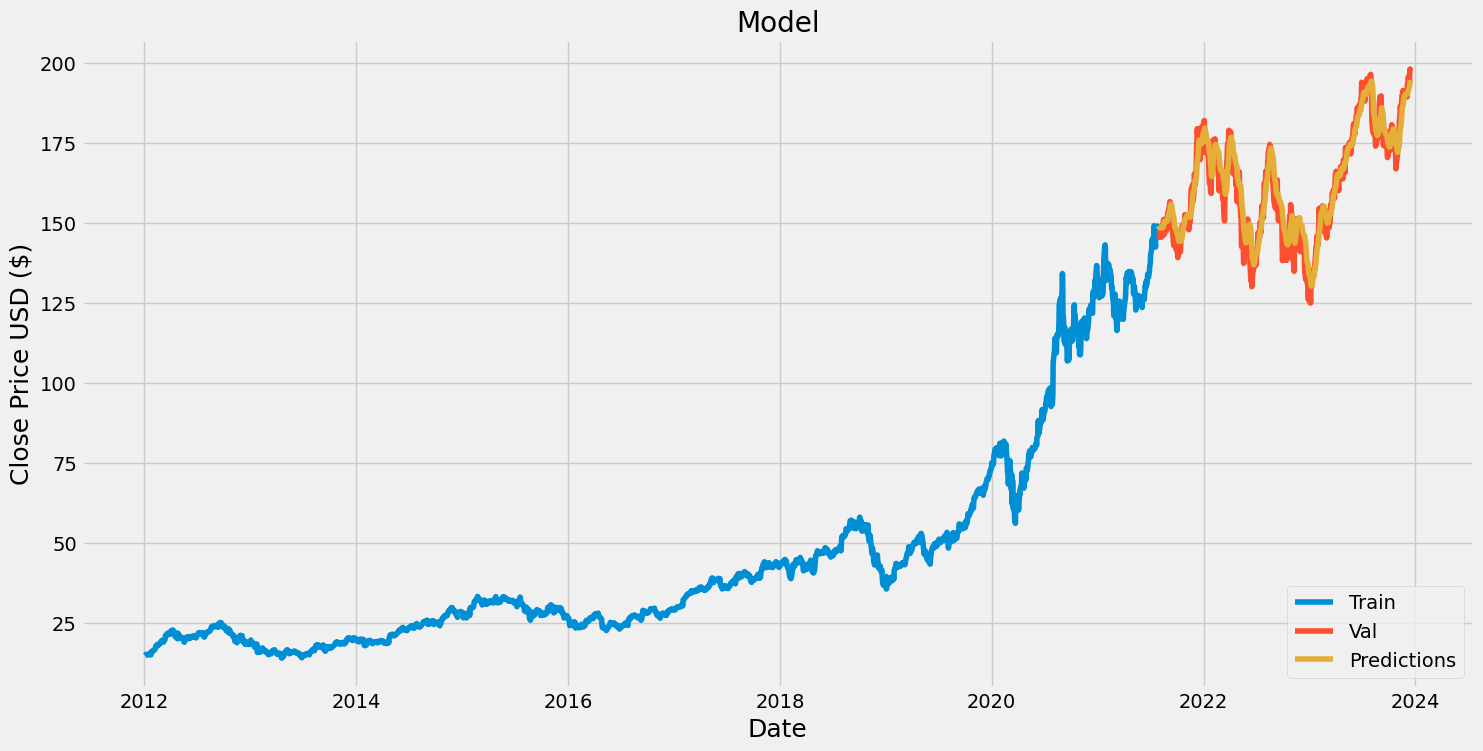

In [73]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

#Visualise the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [76]:
#Get the quote
apple_quote= web.get_data_yahoo('AAPL', start='2012-01-01', end = '2023-12-17')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape (X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 91ms/step
[[195.32135]]


In [81]:
#Get the quote
apple_quote2= web.get_data_yahoo('AAPL', start='2023-12-15', end = '2023-12-18')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-12-15    197.570007
Name: Close, dtype: float64
